# Calculate China-Z Index (CZI) with Python

China Z-Index (CZI) is extensively used by National Climate Centre (NCC) of China to monitor drought conditions throughout
the country (Wu et al., 2001; Dogan et al., 2012). CZI assumes that precipitation data follow the Pearson Type III distribution and is related to Wilson–Hilferty cube-root transformation (Wilson and Hilferty, 1931) from chi-square variable to the Z-scale (Kendall and Stuart, 1977). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Prepare data

In [2]:
data = pd.read_csv('data/prcphq.046037.month.txt', sep=r"\s+",                    
                   skiprows=1, usecols=[1, 2], 
                   parse_dates=True,
                   index_col = 0,
                   names=['Date', 'Rain'])

## Calculate six-monthly CZI

Here we use all years as a reference period to calculate monthly long-term normals. ZSI = (p-pm)/s

In [3]:
data['Rain_6'] = data['Rain'].rolling(6).sum()
df_6mon = data[['Rain_6']].dropna()

In [6]:
df_6mon['CZI'] = np.nan

for imon in np.arange(1, 13):
    sinds = df_6mon.index.month==imon    
    x   = df_6mon[sinds]       
    zsi = (x -x.mean())/x.std()   
    cs  = np.power(zsi, 3)/len(x)
    czi = 6.0/cs*np.power((cs/2.0*zsi + 1.0), 1.0/3.0)-6.0/cs + cs/6.0
    df_6mon.loc[sinds, 'CZI'] = czi.values[:,0]  

In [7]:
data['CZI'] = df_6mon['CZI']
del df_6mon
data.head(7)

,Rain,Rain_6,CZI
Date,,,
1892-01-31,2.5,NaN,NaN
1892-02-29,12.2,NaN,NaN
1892-03-31,1.8,NaN,NaN
1892-04-30,1.5,NaN,NaN
1892-05-31,16.8,NaN,NaN
1892-06-30,1.0,35.8,-0.916046
1892-07-31,11.7,45.0,-0.806537


## Visualize

(-3, 3)

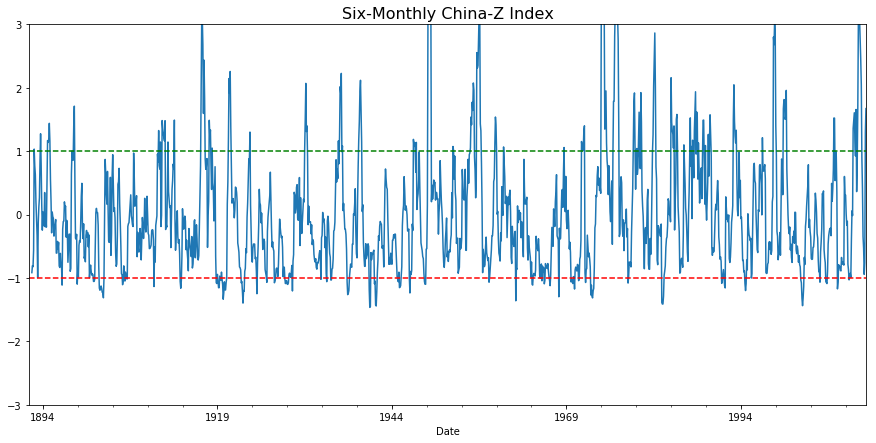

In [10]:
ax = data['CZI'].plot(figsize=(15, 7), )
ax.axhline(1,  linestyle='--', color='g')
ax.axhline(-1, linestyle='--', color='r')
ax.set_title('Six-Monthly China-Z Index', fontsize=16)
ax.set_xlim(data.index.min(), data.index.max())
ax.set_ylim(-3, 3)

In [12]:
data.head(12)

,Rain,Rain_6,CZI
Date,,,
1892-01-31,2.5,NaN,NaN
1892-02-29,12.2,NaN,NaN
1892-03-31,1.8,NaN,NaN
1892-04-30,1.5,NaN,NaN
1892-05-31,16.8,NaN,NaN
1892-06-30,1.0,35.8,-0.916046
1892-07-31,11.7,45.0,-0.806537
1892-08-31,3.6,36.4,-0.823021
1892-09-30,21.6,56.2,-0.564825


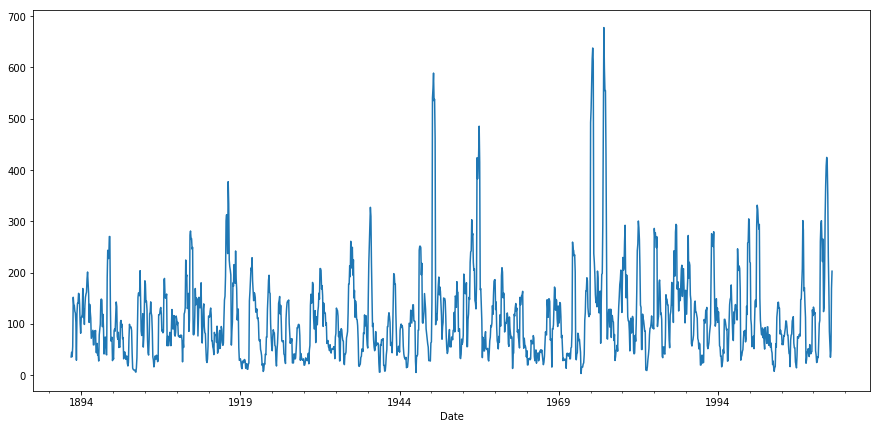

In [14]:
data.Rain_6.plot(figsize=(15, 7),)

## Summary and discussion

NCC computes CZI only for 1-month time step. However, CZI could be computed for five time steps i.e. 1-, 3-, 6-, 9- and 12-month time step.

Many studies comparing the CZI with that of SPI and Z-score reported similar results (Wu et al., 2001; Morid et al., 2006).
Further, Wu et al. (2001) suggested that because of simplicity in calculating drought severity at monthly time step using CZI, it can be preferred over SPI, where rainfall data are often incomplete.

## References

Dogan, S., Berktay, A., Singh, V.P., 2012. Comparison of multi-monthly rainfall-based drought severity indices, with application to semi-arid Konya closed basin, Turkey. J. Hydrol. 470–471, 255–268.

Kendall, M.G.; Stuart, A. The Advanced Theory of Statistics; Charles Griffin & Company-High Wycombe: London, UK, 1997; pp. 400–401.

Morid, S., Smakhtin, V., Moghaddasi, M., 2006. Comparison of seven meteorological indices for drought monitoring in Iran. Int. J. Climatol. 26, 971–985.

Wilson, E.B., Hilferty, M.M., 1931. The Distribution of Chi-Square. Proc. Natl. Acad. Sci. USA 17, 684–688.

Wu, H., Hayes, M.J., Weiss, A., Hu, Q.I., 2001. An evaluation of the standardized precipitation index, the china-Zindex and the statistical Z-Score. Int. J. Climatol.21, 745–758. http://dx.doi.org/10.1002/joc.658.